# Produce a surf report

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import datetime
import pandas as pd

from pysurfline import SpotForecast

In [2]:
params={
    "spotId":"5842041f4e65fad6a7708890",
    "days":7,
    "intervalHours":3,
    }
spot=SpotForecast(params,verbose=True)


-----
ForecastGetter(Type:wave, Status:200)
-----
ForecastGetter(Type:wind, Status:200)
-----
ForecastGetter(Type:tides, Status:200)
-----
ForecastGetter(Type:weather, Status:200)


In [3]:
report=[]
for attr in ["wave","wind","weather"]: #exclude "tides" because of HIGH LOW exact times
    report.append(spot.get_dataframe(attr))
report=pd.concat(report,axis=1)
report.head()

,utcOffset,surf_min,surf_max,surf_optimalScore,swells,utcOffset,speed,direction,directionType,gust,optimalScore,utcOffset,temperature,condition
timestamp,,,,,,,,,,,,,,
2022-02-13 10:00:00,-10,1.4220,1.8268,0,"[{'height': 1.02912, 'period': 8, 'direction':...",-10,27.45028,61.46909,Cross-shore,29.53946,0,-10,22.55325,NIGHT_CLEAR
2022-02-13 13:00:00,-10,1.3315,1.6801,0,"[{'height': 1.13672, 'period': 8, 'direction':...",-10,26.33655,58.48280,Cross-shore,28.50559,0,-10,22.36676,NIGHT_CLEAR
2022-02-13 16:00:00,-10,1.2010,1.4934,0,"[{'height': 1.17986, 'period': 8, 'direction':...",-10,26.38725,63.18200,Cross-shore,28.08024,0,-10,22.30981,NIGHT_BRIEF_SHOWERS_POSSIBLE
2022-02-13 19:00:00,-10,0.9705,1.3267,0,"[{'height': 1.0289, 'period': 6, 'direction': ...",-10,26.22154,57.65973,Cross-shore,26.22154,0,-10,22.48560,CLEAR
2022-02-13 22:00:00,-10,0.8400,1.1500,0,"[{'height': 1.26823, 'period': 6, 'direction':...",-10,21.87551,51.86909,Cross-shore,21.87551,0,-10,22.62952,CLEAR


In [30]:
surf=report.copy()[["surf_min",	"surf_max","speed","directionType"]]
surf["surf_height"]=surf[["surf_min","surf_max"]].mean(axis=1)
surf.head(20)

,surf_min,surf_max,speed,directionType,surf_height
timestamp,,,,,
2022-02-13 10:00:00,1.4220,1.8268,27.45028,Cross-shore,1.6244
2022-02-13 13:00:00,1.3315,1.6801,26.33655,Cross-shore,1.5058
2022-02-13 16:00:00,1.2010,1.4934,26.38725,Cross-shore,1.3472
2022-02-13 19:00:00,0.9705,1.3267,26.22154,Cross-shore,1.1486
2022-02-13 22:00:00,0.8400,1.1500,21.87551,Cross-shore,0.9950
2022-02-14 01:00:00,1.0100,1.0800,21.26102,Cross-shore,1.0450
2022-02-14 04:00:00,0.7200,1.0200,22.38751,Cross-shore,0.8700
2022-02-14 07:00:00,0.6900,1.0000,18.86266,Cross-shore,0.8450
2022-02-14 10:00:00,0.6300,0.9400,17.91167,Cross-shore,0.7850


In [25]:
any(surf.index.duplicated())

False

In [28]:
len(surf)==len(pd.date_range(surf.index[0],surf.index[-1],freq="3H"))

True

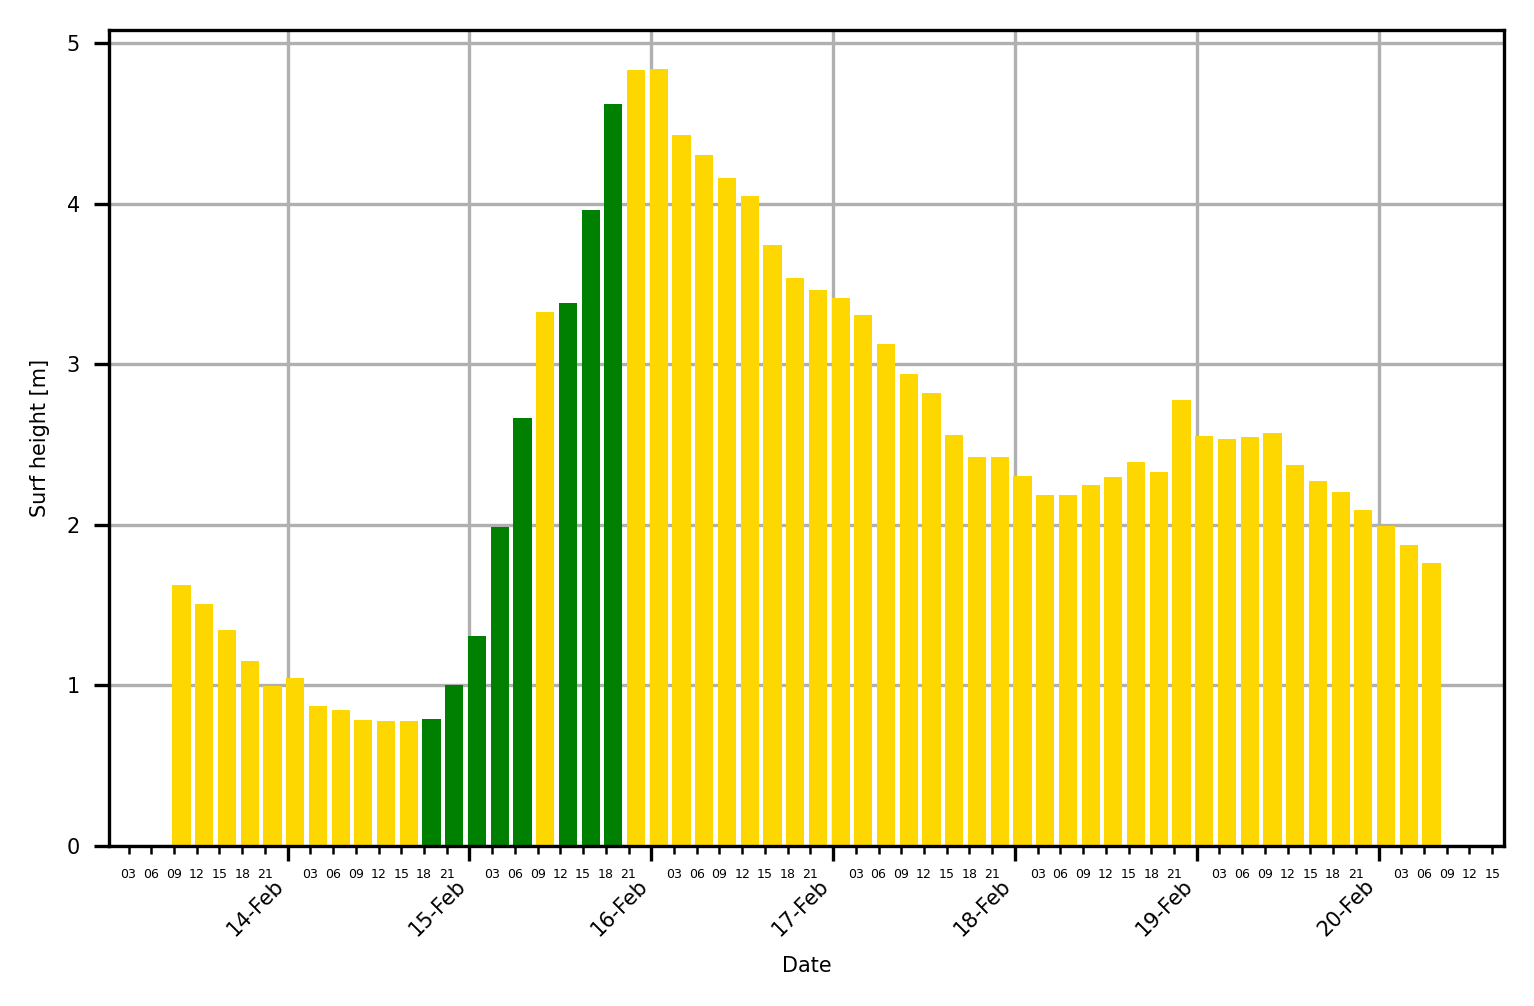

In [39]:
f,ax=plt.subplots(dpi=300)

colors={'Cross-shore':"gold", 'Offshore':"green", 'Onshore':"r"}
surf["hist_color"]=surf["directionType"].map(colors)
ax.grid(axis="y",zorder=0)
ax.bar(
    surf.index,
    surf["surf_height"],
    color=surf["hist_color"],
    zorder=2,width=0.1
    )

if surf["surf_height"].max()<2:
    ax.set_ylim([0,2])

ax.grid(axis="y",zorder=0)
ax.grid(axis="x",which="major",zorder=10000)
ax.figure.autofmt_xdate()
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=(0,3,6,9,12,15,18,21)))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.set(xlabel="Date",ylabel="Surf height [m]")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))

# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=45, horizontalalignment='right',size=5)
for label in ax.get_xticklabels(which='minor'):
    label.set( horizontalalignment='center',size=3)

